In [1]:
import os
os.chdir("D:\Projects\ML_projects\CIFAR_10")

In [2]:
import matplotlib.pyplot as plt
from  MiniGoogleNet import MiniGoogleNet
from load_cifar10_dataset import load_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf


labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog",
	"frog", "horse", "ship", "truck"]

((X_train, y_train), (X_test, y_test)) = tf.keras.datasets.cifar10.load_data()

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [3]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

NUM_EPOCHS = 100
INIT_LR = 1e-2
BATCH_SIZE = 128

# opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / BATCH_SIZE) [Loss = 0.631596897983551,  Accuracy = 0.79%] with X_valid, y_valid

opt = Adam(INIT_LR)

aug = ImageDataGenerator(rotation_range=18, zoom_range=0.15, 
                         width_shift_range=0.2, height_shift_range=0.2,
                         shear_range=0.15, horizontal_flip=True, fill_mode='nearest')

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=5, 
                                              verbose=1, restore_best_weights=True)


In [5]:
model = MiniGoogleNet.build(32, 32, 3, len(labelNames))

model.compile(loss="categorical_crossentropy", optimizer=opt, 
              metrics=['accuracy'])

history = model.fit_generator(aug.flow(X_train, y_train, batch_size=BATCH_SIZE),
                              validation_data=(X_test, y_test),
                              steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
                              epochs=NUM_EPOCHS, 
                              verbose=1)


Epoch 1/100
390/390 [==============================] - 123s 316ms/step - loss: 1.6777 - accuracy: 0.3767 - val_loss: 2.7362 - val_accuracy: 0.2880
Epoch 2/100
390/390 [==============================] - 137s 352ms/step - loss: 1.4051 - accuracy: 0.4891 - val_loss: 3.3509 - val_accuracy: 0.2619
Epoch 3/100
390/390 [==============================] - 142s 365ms/step - loss: 1.2798 - accuracy: 0.5418 - val_loss: 2.7110 - val_accuracy: 0.3534
Epoch 4/100
390/390 [==============================] - 143s 366ms/step - loss: 1.1990 - accuracy: 0.5718 - val_loss: 1.6020 - val_accuracy: 0.5078
Epoch 5/100
390/390 [==============================] - 143s 367ms/step - loss: 1.1496 - accuracy: 0.5927 - val_loss: 1.5355 - val_accuracy: 0.4956
Epoch 6/100
390/390 [==============================] - 143s 368ms/step - loss: 1.1086 - accuracy: 0.6093 - val_loss: 1.3419 - val_accuracy: 0.5768
Epoch 7/100
390/390 [==============================] - 128s 328ms/step - loss: 1.0694 - accuracy: 0.6228 - val_loss: 1

390/390 [==============================] - 112s 286ms/step - loss: 0.5587 - accuracy: 0.8078 - val_loss: 0.7505 - val_accuracy: 0.7709
Epoch 57/100
390/390 [==============================] - 114s 292ms/step - loss: 0.5591 - accuracy: 0.8075 - val_loss: 0.6487 - val_accuracy: 0.7883
Epoch 58/100
390/390 [==============================] - 112s 287ms/step - loss: 0.5548 - accuracy: 0.8092 - val_loss: 0.7259 - val_accuracy: 0.7734
Epoch 59/100
390/390 [==============================] - 114s 292ms/step - loss: 0.5447 - accuracy: 0.8114 - val_loss: 0.7486 - val_accuracy: 0.7777
Epoch 60/100
390/390 [==============================] - 111s 286ms/step - loss: 0.5467 - accuracy: 0.8127 - val_loss: 0.7089 - val_accuracy: 0.7803
Epoch 61/100
390/390 [==============================] - 111s 285ms/step - loss: 0.5482 - accuracy: 0.8115 - val_loss: 1.0290 - val_accuracy: 0.7176
Epoch 62/100
390/390 [==============================] - 111s 286ms/step - loss: 0.5484 - accuracy: 0.8114 - val_loss: 0.9050 

In [6]:
preds = model.predict(X_test, batch_size=BATCH_SIZE)
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [7]:
loss, acc = score
print(f"Loss = {loss}")
print("Accuracy = {:.2f}%".format(acc) )

Loss = 0.594910750246048
Accuracy = 0.82%


In [8]:
print(classification_report(y_test.argmax(axis=1),
                             preds.argmax(axis=1),
                           target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.86      0.86      0.86      1000
  automobile       0.93      0.91      0.92      1000
        bird       0.81      0.75      0.78      1000
         cat       0.82      0.58      0.68      1000
        deer       0.78      0.80      0.79      1000
         dog       0.86      0.68      0.75      1000
        frog       0.70      0.94      0.80      1000
       horse       0.76      0.91      0.83      1000
        ship       0.89      0.87      0.88      1000
       truck       0.87      0.93      0.90      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



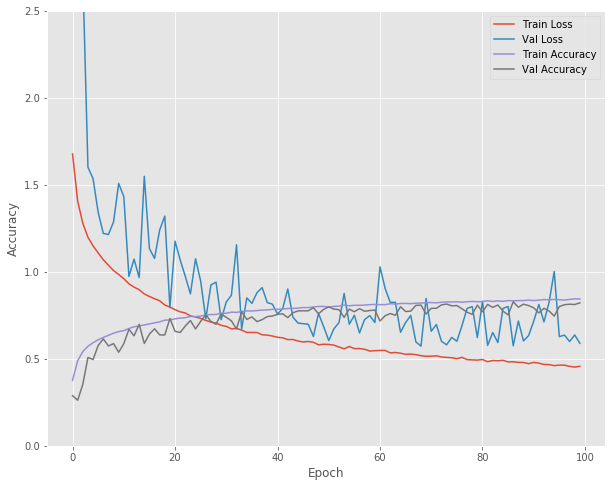

In [9]:
import pandas as pd

hist = pd.DataFrame(history.history)

hist['epoch'] = history.epoch

plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
plt.ylim([0, 2.5])
plt.legend()

plt.show()